# Key Summary

### Mar 8: visualize topic trends



### Mar 1 & 6: parse the rest of transcripts
- POS of "NNP" plus "\r\n" parsed pretty well
- Identify the paragraph breakers
- next: parse


### Feb 23 & 24 & 25: proof of concent
- cleanse the code
- calculate the weight of each word in each topic
- visualization on topics across events

### Feb 17 & 19: impliment POS
- using POS seems to be an easier solution to rmove people's name and titles
- <font color='red'>topcis make more sense now</font>
- Next: remain country names
- idea: use (word, pos) to run topic modeling? 

### Feb 15: topic modeling on paragraphs 2019
- **Try paragraph-based topic modeling and <font color='red'>you can see the topcis are different now</font>**
- cleanse the code

### Feb 12: topic modeling on tf-idf files 2015-2019
- Tried tf-idf on all files, didn't work

### Feb 9: topic modeling on wordcount vector files 2015-2019
As discussed on Feb 3, the input of dynamic topic modeling are files, so I postponed parsing transcripts into paragraphs.

- I downloaded all transcripts from 2015-2019 
- First topic modeling result

### Feb 1: parsing files
- Parse fancy files
- the basic unit: each paragraph spoken by one person (i.e. the content divided by dotted line)
- clean those words that are repeated and obviously useless
- Words appeared in the front page and CORPORATE PARTICIPANTS session are repeated and contain no information


### Jan 27 
- I tried different package to read pdf, and pdftotext works best for the transcripts files
- There are two format types. One is fancier. 
- My next step is to parse the fancier files.


### Reference
- Topic Modeling in Python: Latent Dirichlet Allocation (LDA) https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
- NLTK POS tag list: https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/

# Topic modeling on transcripts from 2015 to 2019

## Parsing

In [1]:
import pandas as pd
import os
from transcript_functions import *
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline  

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\spong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [18]:
%%time
# set years
years = list(range(2015,2020))

# get file names, file paths, type
files = consolidate_files(years)

# parse into paragraphs
df = filenames_to_para(files)

Wall time: 21.5 s


## Preprocessing

In [19]:
%%time
df["tokens"] = df["paragraph"].map(nltk.word_tokenize)

# tag Part of Speech
df["tokens_pos"] = df["tokens"].map(nltk.pos_tag)

## to check distribution of POS tags
# df_all_tokens = get_all_wordsPos(df["tokens_pos"])

# filter words with pos not in pos_remaining
pos_remaining = ["NN", "NNS", 
                 "VB", "VBD", "VBN", "VBP", "VBZ"
                ] # take out "JJ", "JJR", "JJS"
df["tokens_pos"] = df["tokens_pos"].map(lambda x: [tup for tup in x if tup[1] in pos_remaining])

# lemmatize with POS
lemmatizer = WordNetLemmatizer()
df["tokens_clean"] = df["tokens_pos"].map(lambda x: [lemmatizer.lemmatize(tup[0], get_wordnet_pos(tup[1])) for tup in x ])

# remove rows that have no content after lemmatization
df = df[df["tokens_clean"].map(lambda x: len(x)>=1)]

# remove punctuation
punctuation = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~..."
df["tokens_clean"] = df["tokens_clean"].map(lambda x: [word for word in x if word.lower() not in punctuation])

# remove stop words
stop_words = set(stopwords.words('english'))
df["tokens_clean"] = df["tokens_clean"].map(lambda x: [word for word in x if word.lower() not in stop_words])

# remove some specific cases
others = ["'s", "'re", "'ve", "n't", "'ll", "–", "'m"]
df["tokens_clean"] = df["tokens_clean"].map(lambda x: [word for word in x if word.lower() not in others])

# lower case
df["tokens_clean"] = df["tokens_clean"].map(lambda x: [word.lower() for word in x])

df = df[df["tokens_clean"].map(lambda x: len(x)>=1)]

# # remove short words
# df["tokens_clean"] = df["tokens_clean"].map(lambda x: [word for word in x if len(word)>3])

# # remove long words
# df["tokens_clean"] = df["tokens_clean"].map(lambda x: [word for word in x if len(word)<16])

Wall time: 30.2 s


In [45]:
# removing some words
removing_words = [
    "get", "think", "thing", "know", "kind", "way", "look", "year",
     "question", "guy", "thank", "quarter", "lot", "want", "herein",
    "talk", "guess", "see", "say", "make", "go", "store", "customer",
    "business", "time", "ph", "take", "bit", "work", "morning", 
    "company", "mean", "wraptext", "”", '’'
]
df["tokens_clean"] = df["tokens_clean"].map(lambda x: [word for word in x if word.lower() not in removing_words])

## filter out rows containing too few words/tokens
df["len_clean"] = df["tokens_clean"].map(len)
df = df[df["len_clean"]>10]

# removing disclaimer
df = df[df["paragraph"].map(lambda x: "The information in the transcripts" not in x)]
df = df[df["paragraph"].map(lambda x: "disclaimer" not in x.lower())]

In [46]:
# removing some paragraphs
removing_words = ["www.streetevents.com"]

mask = df["tokens_clean"].map(lambda x: removing_words[0] not in x)
df = df[mask]

## Check omni's tag

In [84]:
# df["tokens_pos"] = df["tokens"].map(nltk.pos_tag)
# tokens_pos = df["tokens_pos"]
# key_word = "omni"
# check = get_unique_words(tokens_pos)
# check = pd.DataFrame(check)
# check["pos"] = check.index
# check[check["pos"].map(lambda x: key_word in x[0])]

,0,pos
"(omni-channel, JJ)",10,"(omni-channel, JJ)"
"(omnichannel, NN)",10,"(omnichannel, NN)"
"(omnichannel, JJ)",4,"(omnichannel, JJ)"
"(omni-channel, NN)",3,"(omni-channel, NN)"
"(omni, JJ)",2,"(omni, JJ)"
"(omni-offering, NN)",1,"(omni-offering, NN)"
"(omni, RP)",1,"(omni, RP)"
"(omni-retail, NN)",1,"(omni-retail, NN)"
"(omni, NNS)",1,"(omni, NNS)"
"(omni-retail, JJ)",1,"(omni-retail, JJ)"


In [12]:
# # look at unique words to get a sense what needs to be delete
# unique_words = get_unique_words(df["tokens_clean"])

## LDA

In [4]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [47]:
# prepare count vector as the input of LDA model
df["corpus"] = df["tokens_clean"].map(lambda x: ', '.join(x))
count_vectorizer = CountVectorizer()
count_data = count_vectorizer.fit_transform(df["corpus"])

number_topics = 20

# fix random_state at 33
lda = LDA(n_components=number_topics, n_jobs=-1, random_state =33)
lda.fit(count_data)
       
number_words = 12
# print_topics(lda, count_vectorizer, number_words)

words = count_vectorizer.get_feature_names()

# print topics and key words
for topic in range(0,number_topics):
    topic_vec = lda.components_[topic]
    topic_idx = topic_vec.argsort()[:-10 - 1:-1]
    print("topic:", topic, " ====================")
    for i in topic_idx:
        print('{:<10} {:>10.2%}'.format(words[i], topic_vec[i]/topic_vec.sum()))


Topic #0:
sale percent growth continue comp market increase result basis grow income performance

Topic #1:
brand product start change people help focus associate market area come today

Topic #2:
market ecommerce continue cost opportunity value team give people feel come payment

Topic #3:
guidance expect share impact sale investment rate tax growth currency capital range

Topic #4:
statement call today earnings presentation release walmart investor website intend com president

Topic #5:
member comp investment inventory job club plan holiday price merchant come payable

Topic #6:
associate investment sale experience comp continue wage growth plan drive increase inventory

Topic #7:
focus ecommerce experience tail start progress category deliver brand product fundamental assortment

Topic #8:
team focus center change growth today run management continue term fulfillment inventory

Topic #9:
continue keep share item today trip point give spend data come kayak

Topic #10:
investment ma

## Visualize topic distribution

In [49]:
# assign topic to paragraphs
topic_match = lda.transform(count_data)
df["topic"] = [ x.argsort()[-1] + 1 for x in topic_match]

# # chech how many topics in each paragraphs
# df["number of topics"] = [sum(x>x.mean()) for x in topic_match]

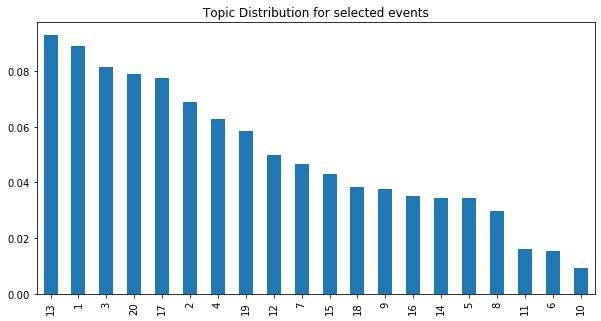

In [50]:
topic_counts = df["topic"].value_counts()
(topic_counts/topic_counts.sum()).plot(x="Topics", y="percentage",
                                       title="Topic Distribution for selected events",
                                       kind="bar", figsize=(10,5))

## Visualize paragraph counts for each year

In [99]:
# df['quarter'] = pd.PeriodIndex(df.date, freq='Q')
df['year'] = pd.PeriodIndex(df.date, freq='Y')

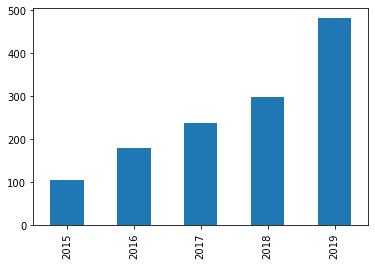

In [100]:
df["year"].value_counts().sort_index().plot(kind='bar')

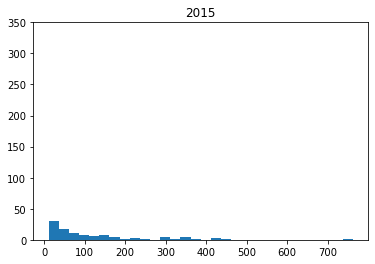

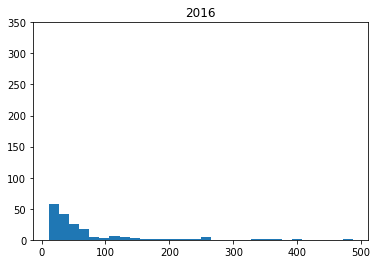

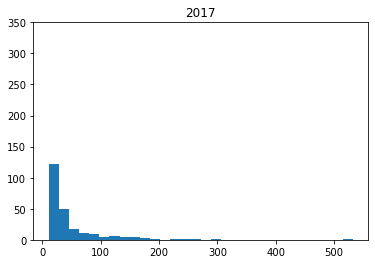

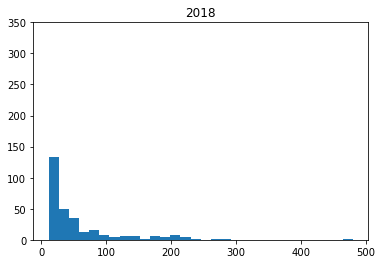

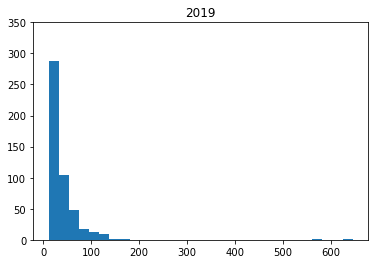

In [113]:
# # visualize the distribution of paragraph length 
# for year in range(2015, 2020):
#     check = df[df.year == year]
#     fig, ax = plt.subplots()
#     plt.hist(check.len_clean, bins=30)
#     plt.ylim(0, 350)
#     # plt.xticks(years, years, rotation='vertical')
#     plt.title(str(year))

In [115]:
df.groupby(by=["year"])["len_clean"].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2015,106.0,123.198113,132.381226,11.0,29.25,67.5,161.00,762.0
2016,179.0,65.201117,77.799250,11.0,20.00,38.0,66.50,487.0
2017,238.0,48.436975,57.466209,11.0,18.00,28.0,50.75,532.0
2018,299.0,56.454849,62.269552,11.0,18.00,29.0,64.00,480.0
2019,482.0,38.209544,45.537945,11.0,17.00,27.0,47.00,646.0


In [139]:
test = df[df.len_clean > 22].copy()

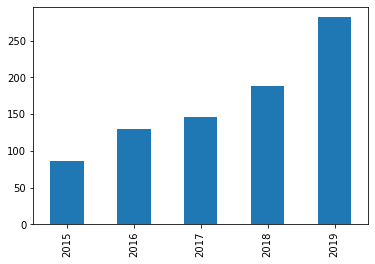

In [140]:
test["year"].value_counts().sort_index().plot(kind='bar')

## Topic trends

In [142]:
tmp = pd.crosstab(test["year"], test["topic"], normalize="index")
years = [ str(x) for x in tmp.index]

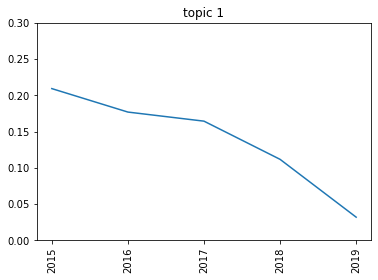

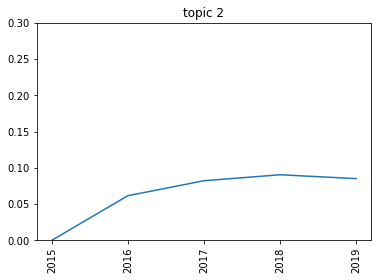

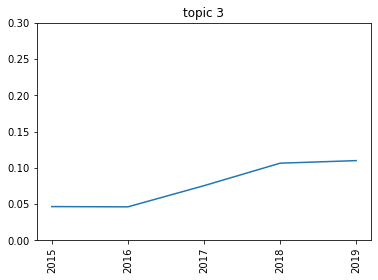

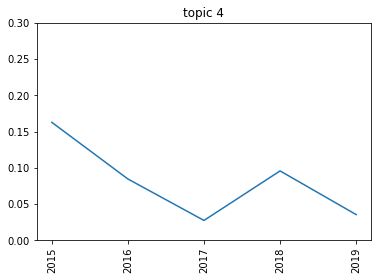

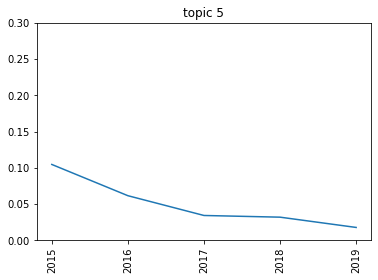

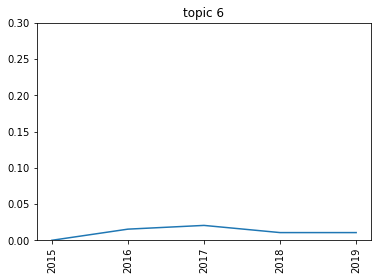

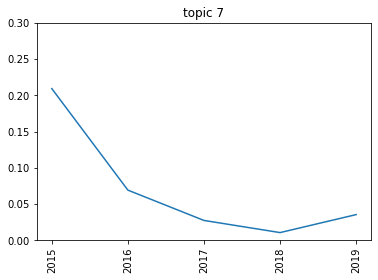

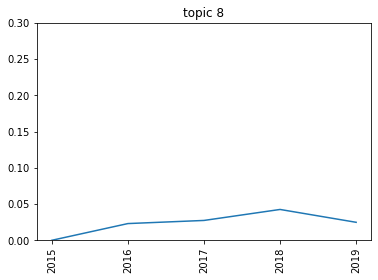

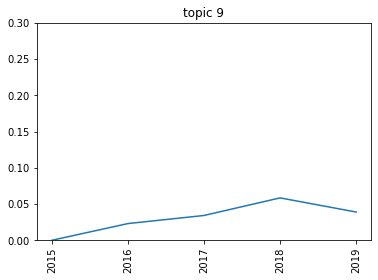

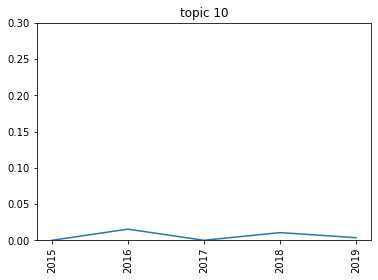

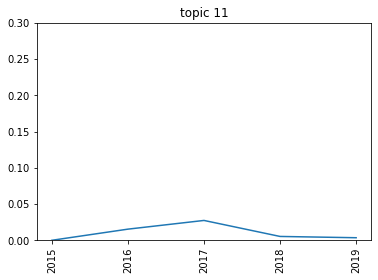

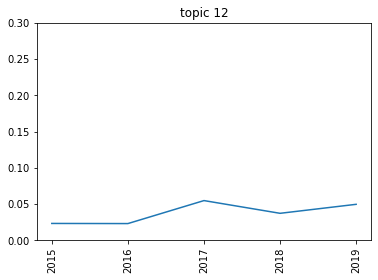

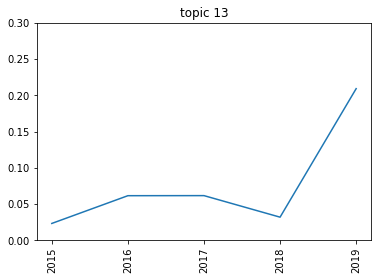

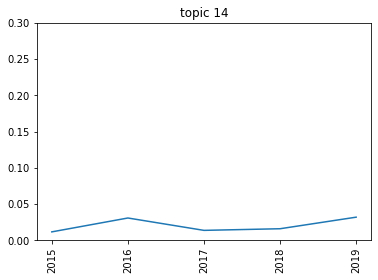

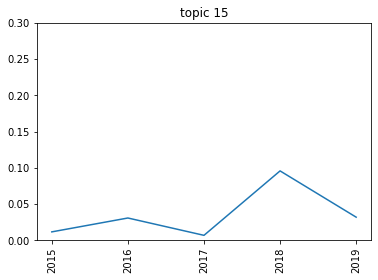

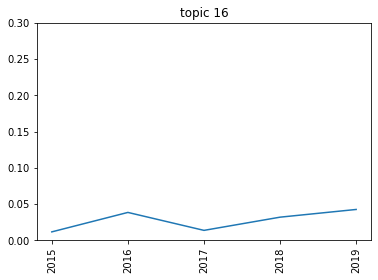

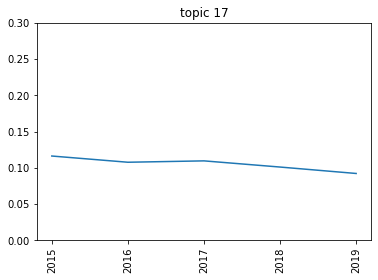

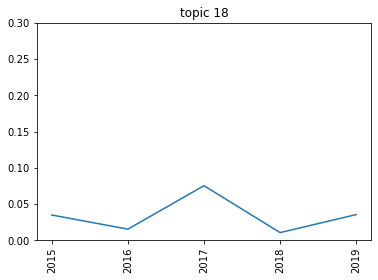

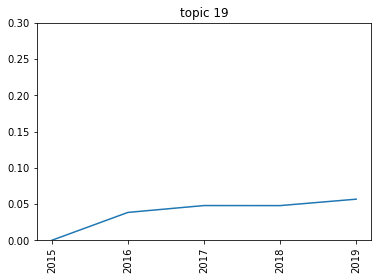

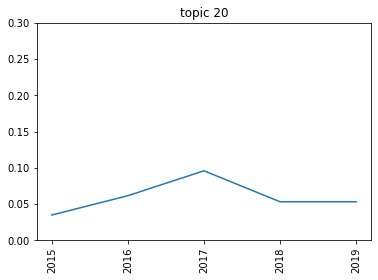

In [143]:
for topic in tmp:
    fig, ax = plt.subplots()
    plt.plot(years, tmp[topic].values)
    plt.ylim(0, 0.3)
    plt.xticks(years, years, rotation='vertical')
    plt.title("topic "+ str(topic))

In [145]:
check = test[test["topic"]==19]
check

,paragraph,date,tokens,tokens_pos,tokens_clean,len_clean,corpus,topic,quarter,number of topics,year
375,WRAPTEXT Chief Financial Officer and Executive...,2016-03-15,"[WRAPTEXT, Chief, Financial, Officer, and, Exe...","[(know, VBP), (grocery, NN), (business, NN), (...","[grocery, presentation, experience, walk, rest...",53,"grocery, presentation, experience, walk, rest,...",19,2016Q1,3,2016
379,WRAPTEXT Chief Financial Officer and Executive...,2016-03-15,"[WRAPTEXT, Chief, Financial, Officer, and, Exe...","[(©, NN), (part, NN), (have, VBP), (gotten, VB...","[©, part, today, bet, surprise, price, on/off,...",54,"©, part, today, bet, surprise, price, on/off, ...",19,2016Q1,1,2016
411,WRAPTEXT Chief Financial Officer and Executive...,2016-03-15,"[WRAPTEXT, Chief, Financial, Officer, and, Exe...","[(lot, NN), (question, NN), (Wo, VBP), (speak,...","[wo, speak, competitor, competitor, set, groce...",55,"wo, speak, competitor, competitor, set, grocer...",19,2016Q1,4,2016
724,WRAPTEXT David Cheesewright - Wal-Mart Stores ...,2016-10-06,"[WRAPTEXT, David, Cheesewright, -, Wal-Mart, S...","[(investment, NN), (moment, NN), (is, VBZ), (r...","[investment, moment, run, cash-and-carries, ve...",39,"investment, moment, run, cash-and-carries, ven...",19,2016Q4,1,2016
772,WRAPTEXT David Cheesewright - Wal-Mart Stores ...,2016-10-06,"[WRAPTEXT, David, Cheesewright, -, Wal-Mart, S...","[(couple, NN), (bits, NNS), (competitiveness, ...","[couple, competitiveness, history, challenge, ...",41,"couple, competitiveness, history, challenge, c...",19,2016Q4,1,2016
1055,WRAPTEXT David Cheesewright - Wal-Mart Stores ...,2017-06-02,"[WRAPTEXT, David, Cheesewright, -, Wal-Mart, S...","[(Executive, NN), (take, VB), (label, NN), (gr...","[executive, label, grow, period, growth, label...",36,"executive, label, grow, period, growth, label,...",19,2017Q2,2,2017
1122,"WRAPTEXT Executive VP , CEO of eCommerce US an...",2017-06-07,"[WRAPTEXT, Executive, VP, ,, CEO, of, eCommerc...","[(eCommerce, NN), (eCommerce, VBP), (closed, V...","[ecommerce, ecommerce, close, deal, spend, mon...",161,"ecommerce, ecommerce, close, deal, spend, mont...",19,2017Q2,5,2017
1246,WRAPTEXT Chief Financial Officer and Executive...,2017-06-13,"[WRAPTEXT, Chief, Financial, Officer, and, Exe...","[(traffic, NN), (is, VBZ), (key, VB), (retaile...","[traffic, key, retailer, stack, comp, traffic,...",74,"traffic, key, retailer, stack, comp, traffic, ...",19,2017Q2,3,2017
1297,WRAPTEXT Chief Financial Officer and Executive...,2017-06-13,"[WRAPTEXT, Chief, Financial, Officer, and, Exe...","[(question, NN), (years, NNS), (have, VBP), (p...","[put, effort, label, use, example, label, use,...",36,"put, effort, label, use, example, label, use, ...",19,2017Q2,3,2017
1476,WRAPTEXT Scott Mushkin from Wolfe Research . A...,2017-10-10,"[WRAPTEXT, Scott, Mushkin, from, Wolfe, Resear...","[(had, VBD), (clarification, NN), (guidance, N...","[clarification, guidance, guidance, seem, refe...",25,"clarification, guidance, guidance, seem, refer...",19,2017Q4,4,2017


In [147]:
check["paragraph"].iloc[0]

"WRAPTEXT Chief Financial Officer and Executive Vice President WRAPTEXT Yes . We know here in the grocery business , which we are , the presentation of fresh and what that WRAPTEXT customer experiences when they walk in the store is critical to the rest of the shopping experience . And WRAPTEXT that includes customers that later shop online . It matters to your brand what they see when they come in WRAPTEXT the store . So you 've heard Steve Bratspies and Greg Foran talk about the amount of time and attention WRAPTEXT that we 're putting on the fresh business . And we know how important it is , particularly as you think WRAPTEXT about things like online grocery , becomes very , very important . We 're testing a number of things in fresh , WRAPTEXT changing sightlines , changing the way that we 're displaying products , cooling products . And you 'll continue WRAPTEXT to see that as we go throughout the year . Customer response has been really good . I think we 've talked WRAPTEXT about

## Visualize components for each year (stop using for now)

IndexError: list index out of range

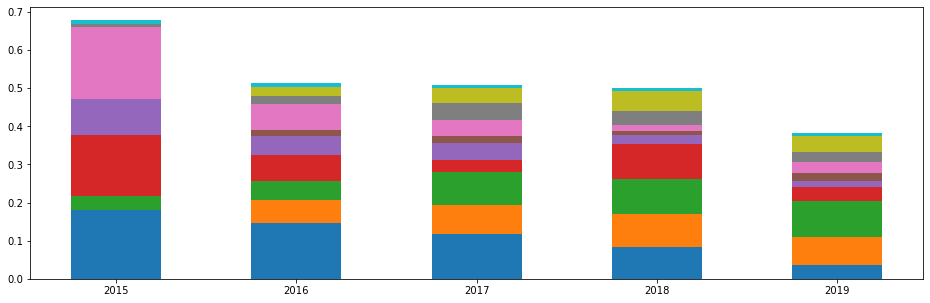

In [144]:
event_tp = df.groupby(by=["year","topic"])["topic"].count().unstack().fillna(0)
tmp = event_tp.T.apply(sum)
event_tp = event_tp.apply(lambda x: x/tmp)
event_tp.index = [str(x)[:10] for x in event_tp.index]

fig, ax = plt.subplots(figsize=(16, 5))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
          'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
bottom = np.array([0]*event_tp.shape[0])
x = event_tp.index.values

for i in event_tp.columns:
#     print(event_tp[i].values)
    plt.bar(x, event_tp[i].values, width=0.5, color=colors[int(i-1)], bottom=bottom)
    bottom = bottom + event_tp[i]

plt.legend(event_tp.columns)
plt.title("Topic distribution across events")

## Below is work before POS

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(count_data) # the input of TfidfTransformer is a matrix of term/token counts
tf_idf_vector = tfidf_transformer.transform(count_data)

number_topics = 10
number_words = 10

lda = LDA(n_components=number_topics, n_jobs=-1, random_state =33)
lda.fit(tf_idf_vector)
print_topics(lda, count_vectorizer, number_words)


Topic #0:
barclays karen short capital thank operator proceed line please next

Topic #1:
pile money development house audience 24 replicate degree either india

Topic #2:
sure pleasure true reasonable super specifically fair card india confusing

Topic #3:
michael lasser securities okay balance thanks dastugue quickly idea mean

Topic #4:
stephens bienvenu richard international mayfield paul trussell deutsche thank bank

Topic #5:
officer walmart gregory foran solid carefully flag remember lost anything

Topic #6:
merchandising back great steve bratspies private part category first opportunity

Topic #7:
bank lynch ohmes merrill america robert sorry guy india scott

Topic #8:
information advertising herein provided including 00 bienvenu stephens correct report

Topic #9:
director douglas mcmillon learning decision holiday might current skus assuming


In [8]:
number_topics = 10
number_words = 10

lda = LDA(n_components=number_topics, n_jobs=-1, random_state =33)
lda.fit(count_data)      
print_topics(lda, count_vectorizer, number_words)


Topic #0:
information capital short barclays karen including provided herein report without

Topic #1:
pickup delivery basket merchandise seeing term shop serve assortment service

Topic #2:
bank securities paul trussell deutsche guy pretty term sure skus

Topic #3:
technology thank feel pretty sure statement place thanks trying 00

Topic #4:
private label long guy five money even inside probably channel

Topic #5:
private category label world model delivery number space versus important

Topic #6:
stephens bienvenu 00 quarter mean next line first please okay

Topic #7:
sale comp quarter margin product number leverage take billion expense

Topic #8:
commerce 00 feel place always world data program profitability done

Topic #9:
item delivery help million sure 00 feel doug center first


### Previous work

In [4]:
import pdftotext
import os
import pandas as pd

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline  

def get_text(filepath):
    pdfFileObj = open(filepath,'rb')
    pdf = pdftotext.PDF(pdfFileObj)
    text = "\n\n".join(pdf)
    return(text)

In [2]:
%%time

path = os.getcwd() + '\data\Transcripts'
years = os.listdir(path)

# get all filenames and the text in the files
files = pd.DataFrame()
for year in years:
    filenames = os.listdir(path + "\\" + year)
    filepaths = [path + "\\" + year + "\\" + filename for filename in filenames]
    texts = [get_text(path) for path in filepaths]
    tmp = pd.DataFrame([filenames, texts]).T
    files = pd.concat([files, tmp], ignore_index=True)

files.columns = ["filename", "text"]

Wall time: 4.4 s


In [3]:
%%time
files["tokens"] = files["text"].map(nltk.word_tokenize)
files["tokens_count"] = files["tokens"].map(len)

Wall time: 9.01 s


#### Decide what words to be deleted

In [4]:
from itertools import chain
all_tokens = list(chain.from_iterable(files["tokens"]))
all_tokens = pd.Series(all_tokens)
tokens_count = all_tokens.value_counts()
len(tokens_count)

11937

In [5]:
%%time
unique_tokens = pd.DataFrame()
unique_tokens["token"] = tokens_count.index
unique_tokens["counts"] = tokens_count.values

punctuation = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~..."
unique_tokens["punctuation"] = unique_tokens["token"].map(lambda x: x in punctuation)

stop_words = set(stopwords.words('english'))
unique_tokens["stop_words"] = unique_tokens["token"].map(lambda x: x.lower() in stop_words)

unique_tokens["only_twice"] = unique_tokens["counts"].map(lambda x: x <= 2)

unique_tokens["len"] = unique_tokens["token"].map(len)
unique_tokens["too_short"] = unique_tokens["len"] <= 2 # this might eliminate US and UK
unique_tokens["too_long"] = unique_tokens["len"] >= 16 

unique_tokens["apostrophe_comma"] = unique_tokens["token"].map(lambda x: '\'' in x or ',' in x)

removing = (unique_tokens["punctuation"] == True) | (unique_tokens["stop_words"] == True) \
| (unique_tokens["only_twice"] == True) | (unique_tokens["too_short"] == True) \
| (unique_tokens["too_long"] == True) | (unique_tokens["apostrophe_comma"] == True)

remain_token = unique_tokens[~removing]

# remain_token[remain_token["token"].map(lambda x: x[0].isupper())]

removing_words = unique_tokens[removing]["token"]

Wall time: 70.4 ms


In [20]:
len(remain_token)

5586

#### Visualize remaining words

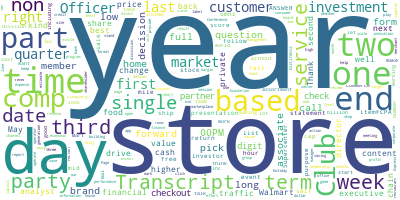

In [7]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(remain_token['token'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

#### Preparing data for LDA

In [35]:
%%time
## need to optimize here
files["cleansed_tokens"] = files["tokens"].map(lambda x: [word for word in x if word in remain_token["token"].values])

Wall time: 2min 50s


In [41]:
files["cleansed_tokens"][0]

['WAL-MART',
 'STORES',
 'INC.',
 'NYSE',
 'WMT',
 'Fourth',
 'Quarter',
 'Fiscal',
 'Year',
 '2015',
 'Earnings',
 'Call',
 'February',
 '2015',
 'Management',
 'call',
 'recorded',
 'Carol',
 'Schumacher',
 'Wal-Mart',
 'Stores',
 'Inc',
 'Global',
 'Investor',
 'Relations',
 'Hello',
 'Carol',
 'Schumacher',
 'vice',
 'president',
 'global',
 'investor',
 'relations',
 'Wal-Mart',
 'Stores',
 'Inc',
 'Thanks',
 'joining',
 'today',
 'date',
 'call',
 'February',
 '2015',
 'call',
 'property',
 'Wal-Mart',
 'Stores',
 'Inc.',
 'intended',
 'use',
 'Walmart',
 'shareholders',
 'investment',
 'community',
 'reproduced',
 'way',
 'listening',
 'phone',
 'may',
 'navigate',
 'call',
 'follows',
 'Press',
 'key',
 'rewind',
 'playback',
 'seconds',
 'Press',
 'key',
 'pause',
 'resume',
 'playback',
 'Press',
 'key',
 'fast-forward',
 'playback',
 'seconds',
 'call',
 'contain',
 'statements',
 'Walmart',
 'believes',
 'forward-',
 'looking',
 'statements',
 'within',
 'meaning',
 'Privat

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation as LDA

files["corpe"] = files["cleansed_tokens"].map(lambda x: ', '.join(x))
count_vectorizer = CountVectorizer()
count_data = count_vectorizer.fit_transform(files["corpe"])

number_topics = 5
number_words = 10

lda = LDA(n_components=number_topics, n_jobs=-1, random_state =33)
lda.fit(count_data)

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
print_topics(lda, count_vectorizer, number_words)


Topic #0:
walmart year sales quarter percent comp growth customers business stores

Topic #1:
reuters thomson stores inc wal mart going year customers walmart

Topic #2:
reuters thomson stores inc walmart think going wal mart really

Topic #3:
walmart inc think chief officer executive president vice financial factset

Topic #4:
year really think walmart business current going one company customers


## 12th Feb
- use tfidf instead of count vector

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(count_data)
tf_idf_vector = tfidf_transformer.transform(count_data)

In [38]:
tf_idf_vector.shape

(48, 4758)

In [39]:
number_topics = 5
number_words = 10

lda = LDA(n_components=number_topics, n_jobs=-1, random_state =33)
lda.fit(tf_idf_vector)

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
print_topics(lda, count_vectorizer, number_words)


Topic #0:
30 provisional self eight allowing marks somewhat finding commentary adjustments

Topic #1:
30 provisional self eight allowing marks somewhat finding commentary adjustments

Topic #2:
30 provisional self eight allowing marks somewhat finding commentary adjustments

Topic #3:
percent sales walmart quarter year comp growth increased results fiscal

Topic #4:
reuters walmart thomson think inc stores business going really year
